# Travail Pratique 6

# <div class="alert alert-block alert-success">
<b>Informations générales </b>
</div>

**Professeur**: Stephan Robert

**Assistant(s)**: Félicien Hêche

**Contact**: stephan.o.robert@gmail.com, felicien.heche@gmail.com ou via Teams

**Rendu**:

- Date: 
- Modalité: Travail individuel. Une fois complétées, copiez les réponses dans le ficher "**TP6_APV_S1-2023_Nom_Prenom.*****" (*** = ce que vous voulez qui soit lisible pour nous: .pdf, .html, ...) en remplaçant Nom et Prenom par les votres puis uploader votre fichier sur Cyberlearn.
- Note: Ce TP est noté sur 6, pour un poids de x%

**Étudiant**:

- Prénom Nom

<div class="alert alert-block alert-success">

<b>But du TP </b>
</div>

Le but de travail pratique est d'étudier les effets des différents paramètres sur la construction d'un arbre de décsision. Pour faire cela, on va utiliser une implémentation de l'arbre de décision fournie par sklearn.


<!---
<div class="alert alert-block alert-info">
<b>Rappel </b>
</div>
-->

<div class="alert alert-block alert-success">
<b>Table des matières </b>
</div>

1. Dataset
2. Arbre de décision
3. Hyperparameter tuning
4. Test


## 1. Dataset

Commençons par importer quelques packages.

In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Nous allons utiliser le même dataset que pour lors du TP 4.

In [2]:
# load the dataset
dataset = datasets.load_wine()
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Nous allons maintenant utiliser ce dataset pour construire notre training, validation et test dataset.

In [8]:
X_train, X_tmp, Y_train, Y_tmp = train_test_split(dataset.data, dataset.target, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=0.5)

## 2. Arbre de décision

Nous allons maintenant écrire une fonction, qui va construire un arbre de décision et l'évaluer. Pour se faciliter la vie, on va utiliser DecisionTreeClassifier de sklearn. Vous pouvez trouver la doc officielle [ici](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [9]:
def build_and_evaluate_decisison_tree(X_train, 
                                      Y_train, 
                                      X_val, 
                                      Y_val, 
                                      criterion='entropy', 
                                      min_samples_split=2,
                                      show=False,
                                      max_depth=None):
    """
    Build a decision tree using (X_train, Y_train) and evaluate it
    on (X_val, Y_val). Return the accuracy on the training and validation dataset and the decison tree.
    
    If the the boolean show is set to True, this function prints the computed accuracy on training and validation dataset.
    """
    # TODO: implement this function
    

In [10]:
# Just a small test
train_acc, val_acc, _ = build_and_evaluate_decisison_tree(X_train, Y_train, X_val, Y_val,show=True)

We obtain a training accuracy of 100.0% and a validation accuracy of 92.59%.


## 3. Hyperparameters tuning

Nous allons maintenant trouver les meilleurs hyperparamètres pour construire notre arbre de décision.

Pour commencer, essayons de la meilleur valeur du paramètre 'min_samples_split'.

In [11]:
def max_split_tuning(X_train, Y_train, X_val, Y_val, min_split=2, max_split=100, show=False):
    """
    Build and evaluate a decision tree on training and evaluation dataset testing all min_samples_split values which go between 
    min_split and max_split value.
    If the parameter 'show' is set to 'True', this function plot the accuracy on validation and training dataset according to 
    parameter min_samples_split.
    
    Returns the best min_samples_split parameter and the accuracy on the validation dataset for the decision tree built with
    this parameter.
    """
    # TODO: implement this function

Nous pouvons maintenant utiliser cette fonction pour estimer le meilleur paramètre 'min_samples_split'.

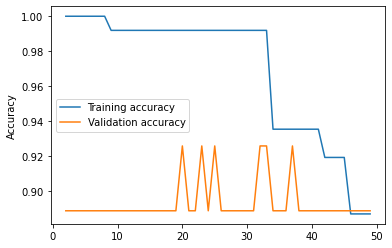

Best_split is 20 which provides a validation accuracy of 92.59%.


In [12]:
best_split, acc = max_split_tuning(X_train, Y_train, X_val, Y_val, min_split=2, max_split=50, show=True)
print('Best_split is {} which provides a validation accuracy of {}%.'.format(best_split, acc))

En utilisant la même approche que ci-dessus, on va essayer de déterminer la valeure la plus adéquate pour le paramètre 'max_depth'.

In [13]:
def max_depth_tuning(X_train, Y_train, X_val, Y_val, split, min_depth=2, max_allowed_depth=100, show=False):
    """
    Build and evaluate a decision tree on training and evaluation dataset testing all values for max_depth parameter which go
    between min_depth and max_allowed_depth
    
    If the parameter show is set to True, this function plot the accuracy on validation and training dataset according to 
    parameter max_depth.
    
    Returns the best max_depth parameter and the accuracy on the validation dataset for the decision tree built with
    this parameter.
    """
    # TODO: implement this function

Déterminons maintenant le paramètre optimal de 'max_depth' en considérant le paramètre 'min_samples_split' estimé ci-dessus.

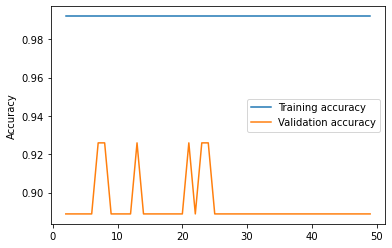

Best_depth is 7 which provides a validation accuracy of 88.89%.


In [14]:
best_depth, acc = max_depth_tuning(X_train, Y_train, X_val, Y_val, 
                                   split=best_split, min_depth=2, 
                                   max_allowed_depth=50, show=True)
print('Best_depth is {} which provides a validation accuracy of {}%.'.format(best_depth, acc))

Maintenant nous allons utiliser une autre approche pour trouver les paramètres 'max_depth' et 'min_samples_split' optimaux.

In [15]:
def grid_search(X_train, 
                Y_train, 
                X_val, 
                Y_val, 
                min_depth=2, 
                max_allowed_depth=30, 
                min_split=2,
                max_split=30):
    """
    Build and evaluate a decision tree on training and evaluation dataset testing all values for max_depth parameter which go
    between min_depth and max_allowed_depth
    
    If the parameter show is set to True, this function plot the accuracy on validation and training dataset according to 
    parameter max_depth.
    
    Returns the best max_depth parameter and the accuracy on the validation dataset for the decision tree built with
    this parameter.
    """
    # TODO: implement this function

In [16]:
best_depth, best_split, best_accuracy = grid_search(X_train, Y_train, X_val, Y_val)


In [17]:
print('Best max_depth parameter is {}, best_split parameter is {}.'.format(best_depth, best_split))
print('Using these two parameters we got a validation accuracy of {}%'.format(np.round(best_accuracy*100, 2)))

Best max_depth parameter is 2, best_split parameter is 7.
Using these two parameters we got a validation accuracy of 92.59%


## 4. Test et visualisation de l'arbre

Maintenant que nous avons déterminé les hyperpamètres les plus judicieux, nous allons construire un arbre de décision en tenant compte de ces paramètres et le tester sur le test dataset.

In [18]:
# TODO : build the decision tree using the best parameter found using 'grid_search' function and test it on the test dataset.

We obtain a training accuracy of 100.0% and a test accuracy of 96.3%


Pour finir, nous allons encore visualiser l'arbre de décision construit. 

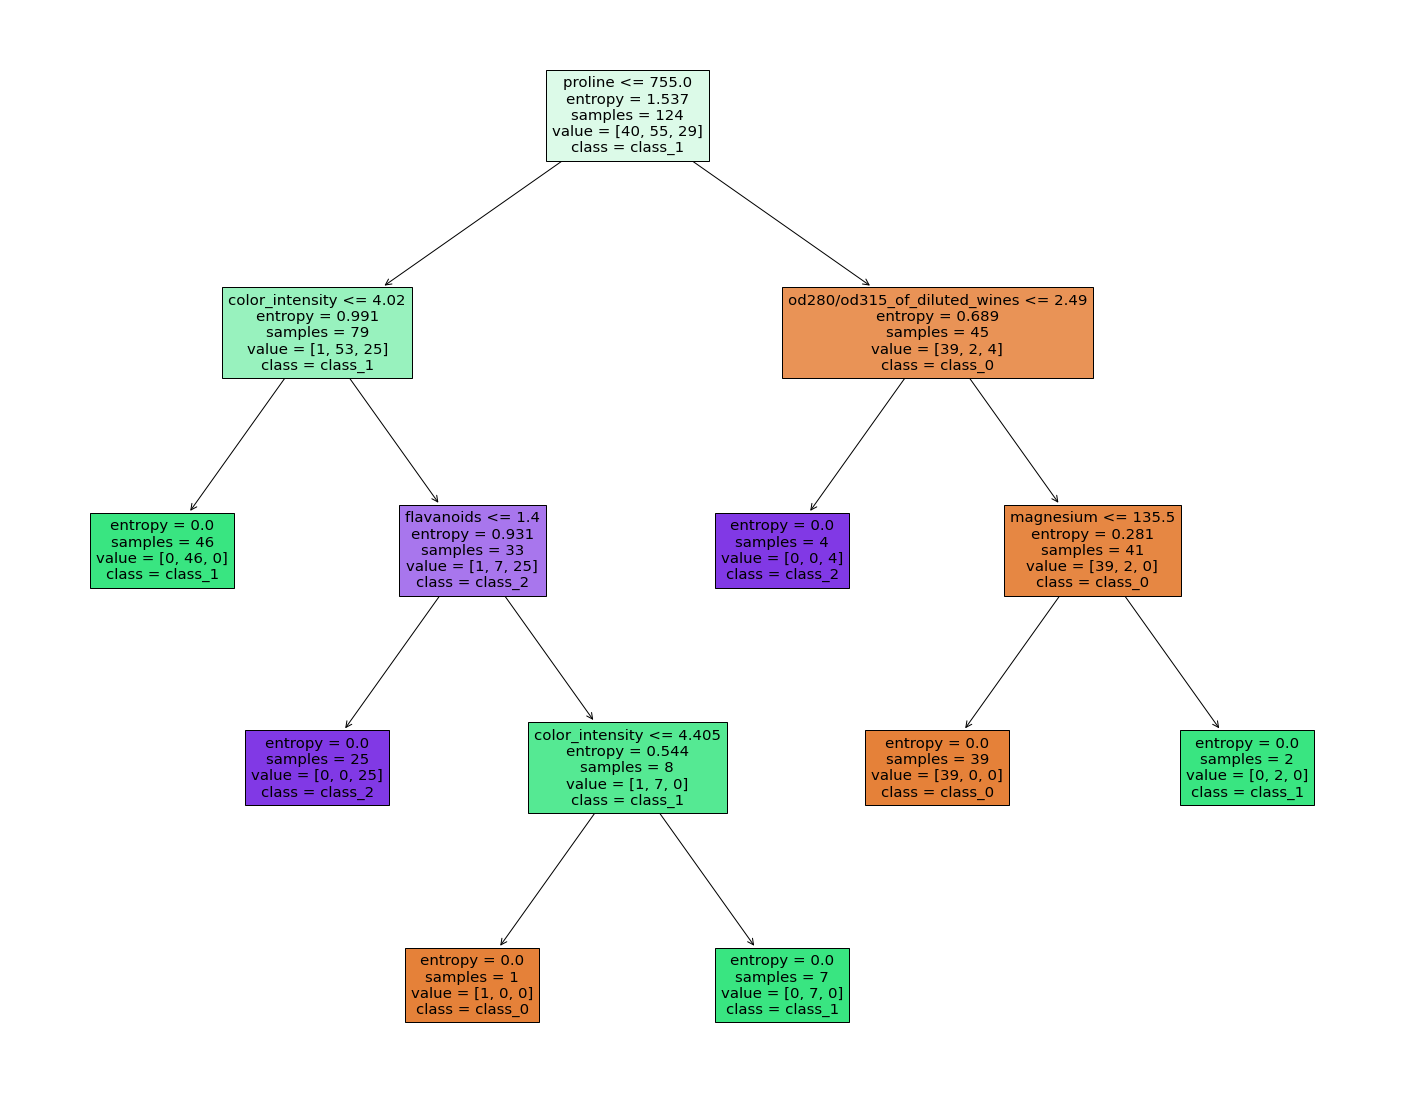

In [19]:
# TODO : plot the decision tree built above.